In [6]:
pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.8/150.0 MB 882.6 kB/s eta 0:02:50
   ---------------------------------------- 1.0/150.0 MB 986.7 kB/s eta 0:02:31
   ---------------------------------------- 1.3/150.0 MB 894.7 kB/s eta 0:02:47
   ---------------------------------------- 1.3/150.0 MB 894.7 kB/s eta 0:02:47
   ---------------------------------------- 1.6/150.0 MB 873.8 kB/s eta 0:02:50
   ---------------------------------------- 1.6/150.0 MB 873.8 kB/s eta 0:02:50
   ------------

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [9]:
dataset = pd.read_csv('creditcard.csv')
dataset.shape


(284807, 31)

In [10]:
dataset.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

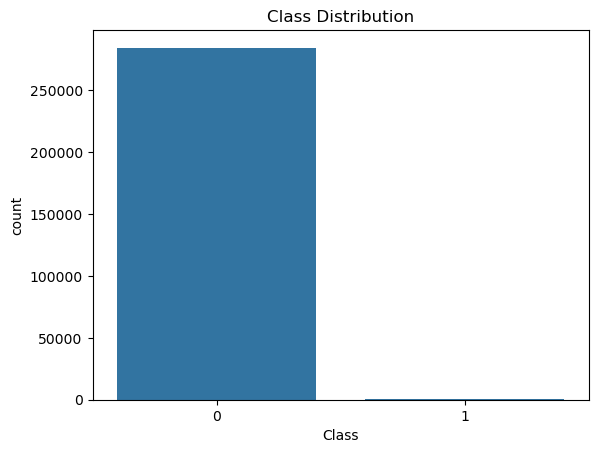

Class
0    284315
1       492
Name: count, dtype: int64


In [11]:
sns.countplot(x='Class', data=dataset)
plt.title("Class Distribution")
plt.show()
print(dataset['Class'].value_counts())


In [19]:
# Drop 'Time' and apply scaling to all remaining features (including 'Amount')
X_full = dataset.drop('Class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)
X = pd.DataFrame(X_scaled, columns=X_full.columns)
y = dataset['Class']


In [13]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
def simulate_transaction(model, transaction_data):
    transaction_data_scaled = scaler.transform(transaction_data)
    prediction = model.predict(transaction_data_scaled)
    return "Fraudulent" if prediction[0] == 1 else "Legitimate"

# Example (using 1 row from test data)
sample = x_test.iloc[10:11]
print(simulate_transaction(rf, sample))


Legitimate


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [21]:
import datetime

log = []

def log_prediction(transaction, model_name, prediction):
    timestamp = datetime.datetime.now()
    log_entry = {
        'Time': timestamp,
        'Model': model_name,
        'Prediction': prediction
    }
    log.append(log_entry)

log_prediction(sample, "RandomForest", simulate_transaction(rf, sample))
pd.DataFrame(log)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


,Time,Model,Prediction
0,2025-06-09 11:14:01.440505,RandomForest,Legitimate


In [22]:
# This is just a cell to save the API as a .py file for deployment
api_code = '''
from flask import Flask, request, jsonify
import numpy as np
import joblib

app = Flask(__name__)
model = joblib.load("fraud_model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    features = np.array(data["features"]).reshape(1, -1)
    result = model.predict(features)
    return jsonify({"prediction": int(result[0])})

if __name__ == "__main__":
    app.run(debug=True)
'''

with open("app.py", "w") as f:
    f.write(api_code)


In [23]:
import joblib
joblib.dump(rf, "fraud_model.pkl")


['fraud_model.pkl']

#### Regulatory Compliance
This model adheres to data privacy principles. No personal information is stored or logged. All predictions are anonymized and logged only with metadata for monitoring. The system is designed considering GDPR compliance.